In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import os
import calendar
import string
%matplotlib inline

In [2]:
# figure root
fig_root = os.environ['HOME']+'/work/E3SMv1_Future_Projection/figures'
save_fig = True

In [3]:
# set esgf
esgf_root = '/global/homes/q/qingli/project/cmip6_projection/esgf'
# list of models
prefix_list0 = [filename[:-17] for filename in os.listdir(esgf_root) if filename.startswith('tosga')]
prefix_list  = list(set(prefix_list0))
prefix_list

['tosga_Omon_CanESM5_historical_r25i1p2f1_gn',
 'tosga_Omon_NorESM2-LM_ssp585_r1i1p1f1_gm',
 'tosga_Omon_CanESM5_ssp585_r15i1p1f1_gn',
 'tosga_Omon_CNRM-CM6-1_ssp585_r1i1p1f2_gn',
 'tosga_Omon_CanESM5_historical_r7i1p1f1_gn',
 'tosga_Omon_CESM2-WACCM_ssp585_r2i1p1f1_gn',
 'tosga_Omon_MPI-ESM1-2-HR_historical_r5i1p1f1_gn',
 'tosga_Omon_UKESM1-0-LL_historical_r8i1p1f2_gm',
 'tosga_Omon_MPI-ESM1-2-LR_historical_r2i1p1f1_gn',
 'tosga_Omon_CanESM5_ssp585_r25i1p2f1_gn',
 'tosga_Omon_FGOALS-g3_historical_r5i1p1f1_gn',
 'tosga_Omon_CanESM5_ssp585_r20i1p1f1_gn',
 'tosga_Omon_ACCESS-ESM1-5_historical_r6i1p1f1_gn',
 'tosga_Omon_CanESM5_ssp585_r24i1p2f1_gn',
 'tosga_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn',
 'tosga_Omon_CanESM5_historical_r23i1p1f1_gn',
 'tosga_Omon_CESM2-WACCM_ssp585_r3i1p1f1_gn',
 'tosga_Omon_CESM2-WACCM_historical_r3i1p1f1_gn',
 'tosga_Omon_MRI-ESM2-0_ssp585_r3i1p1f1_gm',
 'tosga_Omon_CNRM-CM6-1_ssp585_r6i1p1f2_gn',
 'tosga_Omon_CESM2_ssp585_r11i1p1f1_gn',
 'tosga_Omon_CNRM-CM6-1_h

In [4]:
expid_sub = 'ssp585'
#expid_sub = 'historical'
sources = []
for vprefix in prefix_list:
    var, realm, model, expid, variantid, gridid = vprefix.split('_')
    s = {
        'prefix': vprefix,
        'variable': var,
        'realm': realm,
        'model': model,
        'expid': expid,
        'variantid': variantid,
        'gridid': gridid,
    }
    if s['expid'] == expid_sub:
        sources.append(s)

In [5]:
# load esgf data
esgf_vars = []
for s in sources:
    print(s['prefix'])
    infile_list = [esgf_root+'/'+filename \
                   for filename in os.listdir(esgf_root) if filename.startswith(s['prefix'])]
    print('Opening {:d} files...'.format(len(infile_list)))
    dset = xr.open_mfdataset(infile_list, combine='by_coords')
    da = dset.data_vars[s['variable']]
    esgf_vars.append(da)
    dset.close()
        

tosga_Omon_NorESM2-LM_ssp585_r1i1p1f1_gm
Opening 9 files...
tosga_Omon_CanESM5_ssp585_r15i1p1f1_gn
Opening 1 files...
tosga_Omon_CNRM-CM6-1_ssp585_r1i1p1f2_gn
Opening 1 files...
tosga_Omon_CESM2-WACCM_ssp585_r2i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r25i1p2f1_gn
Opening 1 files...


/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.3.0/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.3.0/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


tosga_Omon_CanESM5_ssp585_r20i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r24i1p2f1_gn
Opening 1 files...
tosga_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn
Opening 1 files...
tosga_Omon_CESM2-WACCM_ssp585_r3i1p1f1_gn
Opening 2 files...
tosga_Omon_MRI-ESM2-0_ssp585_r3i1p1f1_gm
Opening 1 files...
tosga_Omon_CNRM-CM6-1_ssp585_r6i1p1f2_gn
Opening 1 files...
tosga_Omon_CESM2_ssp585_r11i1p1f1_gn
Opening 2 files...
tosga_Omon_CanESM5_ssp585_r23i1p1f1_gn
Opening 1 files...
tosga_Omon_UKESM1-0-LL_ssp585_r4i1p1f2_gm
Opening 2 files...
tosga_Omon_CanESM5_ssp585_r2i1p1f1_gn
Opening 1 files...
tosga_Omon_INM-CM5-0_ssp585_r1i1p1f1_gr1
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r8i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r14i1p2f1_gn
Opening 1 files...
tosga_Omon_CNRM-CM6-1_ssp585_r2i1p1f2_gn
Opening 1 files...
tosga_Omon_IPSL-CM6A-LR_ssp585_r3i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r6i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r8i1p1f1_gn
Opening 1 files...

/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.3.0/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


tosga_Omon_CanESM5_ssp585_r14i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r24i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r6i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r3i1p1f1_gn
Opening 1 files...
tosga_Omon_CNRM-ESM2-1_ssp585_r4i1p1f2_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r7i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r13i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r5i1p1f1_gn
Opening 1 files...
tosga_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r2i1p2f1_gn
Opening 1 files...
tosga_Omon_CNRM-ESM2-1_ssp585_r2i1p1f2_gn
Opening 1 files...
tosga_Omon_MRI-ESM2-0_ssp585_r1i1p1f1_gm
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r12i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r1i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r20i1p2f1_gn
Opening 1 files...
tosga_Omon_MPI-ESM1-2-LR_ssp585_r10i1p1f1_gn
Opening 5 files...
tosga_Omon_CanESM5_ssp585_r10i1p2f1_gn
Opening 1 files...
tos

/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.3.0/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


tosga_Omon_HadGEM3-GC31-MM_ssp585_r4i1p1f3_gm
Opening 5 files...
tosga_Omon_CNRM-CM6-1_ssp585_r4i1p1f2_gn
Opening 1 files...
tosga_Omon_MRI-ESM2-0_ssp585_r5i1p1f1_gm
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r15i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r10i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r23i1p2f1_gn
Opening 1 files...
tosga_Omon_MPI-ESM1-2-LR_ssp585_r2i1p1f1_gn
Opening 5 files...
tosga_Omon_MPI-ESM1-2-LR_ssp585_r8i1p1f1_gn
Opening 5 files...
tosga_Omon_CanESM5_ssp585_r25i1p1f1_gn
Opening 1 files...
tosga_Omon_IPSL-CM6A-LR_ssp585_r6i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r22i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r19i1p1f1_gn
Opening 1 files...
tosga_Omon_IPSL-CM6A-LR_ssp585_r14i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r5i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r4i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r16i1p2f1_gn
Opening 1 files...
tosga_Omon_CNRM-ESM2-1_ssp585_r5i1p1f2_gn
Op

/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.3.0/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


tosga_Omon_MRI-ESM2-0_ssp585_r1i2p1f1_gm
Opening 1 files...
tosga_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn
Opening 1 files...
tosga_Omon_BCC-CSM2-MR_ssp585_r1i1p1f1_gn
Opening 1 files...
tosga_Omon_MPI-ESM1-2-HR_ssp585_r2i1p1f1_gn
Opening 18 files...
tosga_Omon_CanESM5_ssp585_r17i1p1f1_gn
Opening 1 files...
tosga_Omon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gm
Opening 2 files...
tosga_Omon_CanESM5_ssp585_r9i1p1f1_gn
Opening 1 files...
tosga_Omon_HadGEM3-GC31-LL_ssp585_r2i1p1f3_gm
Opening 2 files...
tosga_Omon_MPI-ESM1-2-LR_ssp585_r7i1p1f1_gn
Opening 5 files...
tosga_Omon_CanESM5_ssp585_r11i1p2f1_gn
Opening 1 files...
tosga_Omon_MPI-ESM1-2-LR_ssp585_r6i1p1f1_gn
Opening 5 files...
tosga_Omon_CanESM5_ssp585_r11i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r18i1p2f1_gn
Opening 1 files...
tosga_Omon_CESM2-WACCM_ssp585_r4i1p1f1_gn
Opening 2 files...
tosga_Omon_UKESM1-0-LL_ssp585_r3i1p1f2_gm
Opening 2 files...


/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.3.0/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


tosga_Omon_CanESM5_ssp585_r16i1p1f1_gn
Opening 1 files...
tosga_Omon_INM-CM4-8_ssp585_r1i1p1f1_gr1
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r19i1p2f1_gn
Opening 1 files...
tosga_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn
Opening 18 files...
tosga_Omon_CanESM5_ssp585_r9i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r13i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r21i1p1f1_gn
Opening 1 files...
tosga_Omon_HadGEM3-GC31-LL_ssp585_r3i1p1f3_gm
Opening 2 files...
tosga_Omon_IPSL-CM6A-LR_ssp585_r2i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r22i1p1f1_gn
Opening 1 files...
tosga_Omon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gn
Opening 1 files...


In [6]:
esgf_data = []
for i, da in enumerate(esgf_vars):
    print(sources[i]['prefix'])
    esgf_data.append(da.values[:].squeeze())
    print(da.values[:].squeeze().size)
esgf_data = np.array(esgf_data)
print(esgf_data.shape)
    

tosga_Omon_NorESM2-LM_ssp585_r1i1p1f1_gm
1032
tosga_Omon_CanESM5_ssp585_r15i1p1f1_gn
1032
tosga_Omon_CNRM-CM6-1_ssp585_r1i1p1f2_gn
1032
tosga_Omon_CESM2-WACCM_ssp585_r2i1p1f1_gn
1032
tosga_Omon_CanESM5_ssp585_r25i1p2f1_gn
1032
tosga_Omon_CanESM5_ssp585_r20i1p1f1_gn
1032
tosga_Omon_CanESM5_ssp585_r24i1p2f1_gn
1032
tosga_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn
1032
tosga_Omon_CESM2-WACCM_ssp585_r3i1p1f1_gn
1032
tosga_Omon_MRI-ESM2-0_ssp585_r3i1p1f1_gm
1032
tosga_Omon_CNRM-CM6-1_ssp585_r6i1p1f2_gn
1032
tosga_Omon_CESM2_ssp585_r11i1p1f1_gn
1032
tosga_Omon_CanESM5_ssp585_r23i1p1f1_gn
1032
tosga_Omon_UKESM1-0-LL_ssp585_r4i1p1f2_gm
1032
tosga_Omon_CanESM5_ssp585_r2i1p1f1_gn
1032
tosga_Omon_INM-CM5-0_ssp585_r1i1p1f1_gr1
1032
tosga_Omon_CanESM5_ssp585_r8i1p2f1_gn
1032
tosga_Omon_CanESM5_ssp585_r14i1p2f1_gn
1032
tosga_Omon_CNRM-CM6-1_ssp585_r2i1p1f2_gn
1032
tosga_Omon_IPSL-CM6A-LR_ssp585_r3i1p1f1_gn
1032
tosga_Omon_CanESM5_ssp585_r6i1p2f1_gn
1032
tosga_Omon_CanESM5_ssp585_r8i1p1f1_gn
1032
tosga_Omon

In [7]:
# monthly to annually
if expid_sub == 'ssp585':
    time = np.linspace(2015,2099,85)
elif expid_sub == 'historical':
    time = np.linspace(1850,2014,165)
ntime = len(time)
nsource = len(sources)
esgf_data_ann = np.zeros([nsource, ntime])
for i in np.arange(ntime):
    esgf_data_ann[:,i] = np.mean(esgf_data[:,i*12:(i+1)*12], axis=1)
    

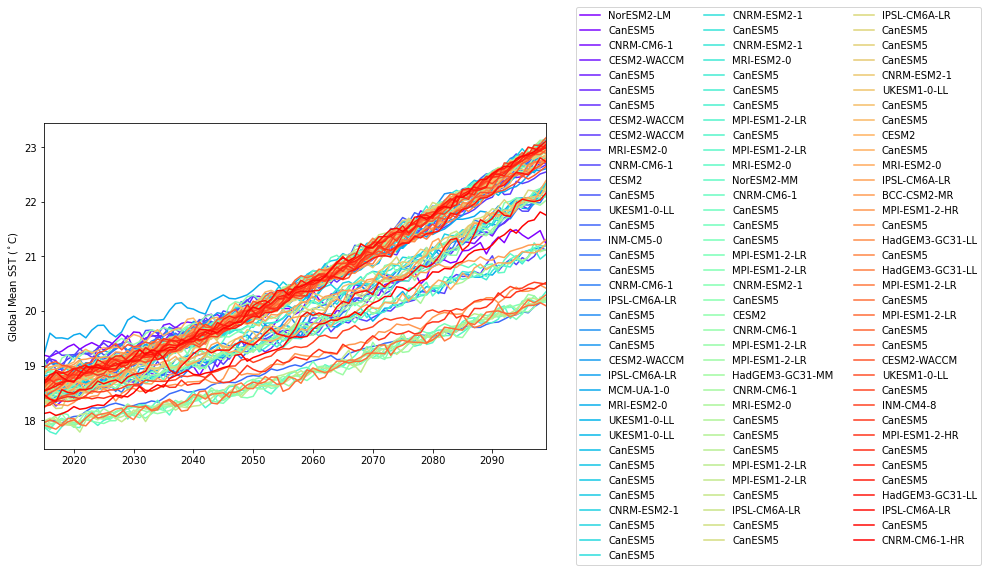

In [8]:
cmap = cm.get_cmap('rainbow')
ifrac = np.linspace(0,1,nsource)

fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
for k in np.arange(nsource):
    plt.plot(time, esgf_data_ann[k,:], \
            color=cmap(ifrac[k]), \
            label=sources[k]['model'])
ax.set_ylabel('Global Mean SST ($^\circ$C)')
ax.set_xlim([time[0], time[-1]])
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=3)


In [9]:
esgf_label = [s['model']+'_'+s['variantid'] for s in sources]
print(esgf_label)

['NorESM2-LM_r1i1p1f1', 'CanESM5_r15i1p1f1', 'CNRM-CM6-1_r1i1p1f2', 'CESM2-WACCM_r2i1p1f1', 'CanESM5_r25i1p2f1', 'CanESM5_r20i1p1f1', 'CanESM5_r24i1p2f1', 'CESM2-WACCM_r1i1p1f1', 'CESM2-WACCM_r3i1p1f1', 'MRI-ESM2-0_r3i1p1f1', 'CNRM-CM6-1_r6i1p1f2', 'CESM2_r11i1p1f1', 'CanESM5_r23i1p1f1', 'UKESM1-0-LL_r4i1p1f2', 'CanESM5_r2i1p1f1', 'INM-CM5-0_r1i1p1f1', 'CanESM5_r8i1p2f1', 'CanESM5_r14i1p2f1', 'CNRM-CM6-1_r2i1p1f2', 'IPSL-CM6A-LR_r3i1p1f1', 'CanESM5_r6i1p2f1', 'CanESM5_r8i1p1f1', 'CanESM5_r21i1p2f1', 'CESM2-WACCM_r5i1p1f1', 'IPSL-CM6A-LR_r4i1p1f1', 'MCM-UA-1-0_r1i1p1f2', 'MRI-ESM2-0_r4i1p1f1', 'UKESM1-0-LL_r8i1p1f2', 'UKESM1-0-LL_r1i1p1f2', 'CanESM5_r14i1p1f1', 'CanESM5_r24i1p1f1', 'CanESM5_r6i1p1f1', 'CanESM5_r3i1p1f1', 'CNRM-ESM2-1_r4i1p1f2', 'CanESM5_r7i1p2f1', 'CanESM5_r13i1p2f1', 'CanESM5_r5i1p1f1', 'CNRM-ESM2-1_r1i1p1f2', 'CanESM5_r2i1p2f1', 'CNRM-ESM2-1_r2i1p1f2', 'MRI-ESM2-0_r1i1p1f1', 'CanESM5_r12i1p2f1', 'CanESM5_r1i1p2f1', 'CanESM5_r20i1p2f1', 'MPI-ESM1-2-LR_r10i1p1f1', 'CanE

In [10]:
np.savez('esgf_sst_'+expid_sub+'.npz', data=esgf_data_ann, time=time, label=esgf_label)